In [14]:
import numpy as np 
import matplotlib.pyplot as plt
import os
import pandas as pd
import glob

In [15]:
input_dir = os.path.join('..',"..", 'input', 'cassava-leaf-disease-classification')

In [16]:
x = pd.read_csv(os.path.join(input_dir, 'train.csv'))
x["image_path"] = os.path.join(input_dir,"train_images")
x["image_path"] = x["image_path"].str.cat(x["image_id"], sep=os.path.sep)

train_dict = dict( zip(x["image_path"],x["label"]) )

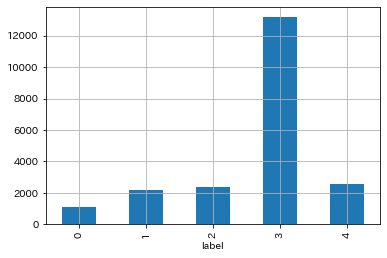

In [20]:
train_df = x[["image_path","label"]]
label_num = train_df.groupby("label")["label"].count()

label_num.plot.bar()
plt.grid()
plt.show()

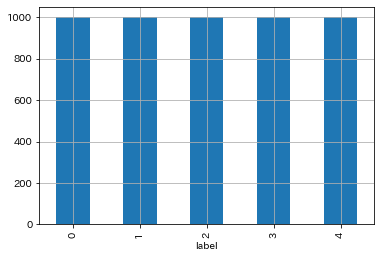

In [26]:
NUM = 1000

train_df = x[["image_path","label"]]
label_num = train_df.groupby("label")["label"].count()

out = pd.concat( [df.sample(n=NUM, replace=True) for l,df in train_df.groupby("label")] )

label_num = out.groupby("label")["label"].count()

label_num.plot.bar()
plt.grid()
plt.show()

In [28]:
def EqualizeLabels(train_df,NUM):
    train_df = train_df[["image_id","image_path","label"]]
    out = pd.concat( [df.sample(n=NUM, replace=True) for l,df in train_df.groupby("label")] )

    return out

In [31]:
x = pd.read_csv(os.path.join(input_dir, 'train.csv'))
x["image_path"] = os.path.join(input_dir,"train_images")
x["image_path"] = x["image_path"].str.cat(x["image_id"], sep=os.path.sep)


train_df = EqualizeLabels(x,NUM=500)
train_dict = dict( zip(x["image_path"],x["label"]) )

train_df

,image_id,image_path,label
18840,519050764.jpg,..\..\input\cassava-leaf-disease-classificatio...,0
12668,3269646431.jpg,..\..\input\cassava-leaf-disease-classificatio...,0
16382,3950368220.jpg,..\..\input\cassava-leaf-disease-classificatio...,0
482,1085950509.jpg,..\..\input\cassava-leaf-disease-classificatio...,0
1831,1322108824.jpg,..\..\input\cassava-leaf-disease-classificatio...,0
...,...,...,...
16117,3902577668.jpg,..\..\input\cassava-leaf-disease-classificatio...,4
6471,2159752225.jpg,..\..\input\cassava-leaf-disease-classificatio...,4
11292,3018000932.jpg,..\..\input\cassava-leaf-disease-classificatio...,4
14518,3600939032.jpg,..\..\input\cassava-leaf-disease-classificatio...,4
